In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Load the dataset
(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], with_info=True, as_supervised=True)

# View the number of training and testing images
train_size = ds_info.splits['train'].num_examples
test_size = ds_info.splits['test'].num_examples
print(f"Number of training images: {train_size}")
print(f"Number of testing images: {test_size}")


Number of training images: 1027
Number of testing images: 256


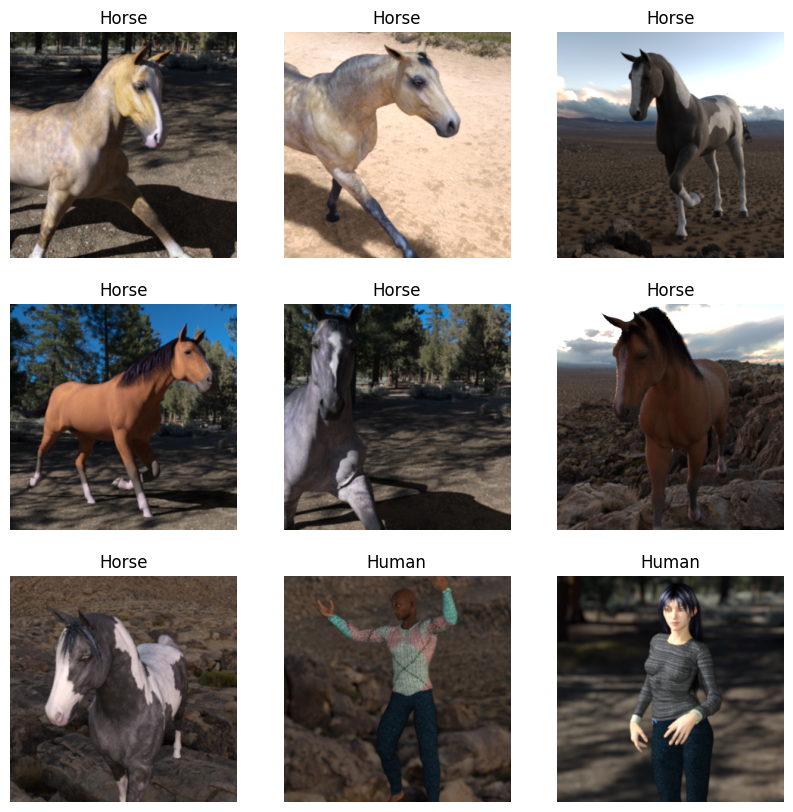

In [3]:
# Plot sample images
def plot_samples(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Horse" if label == 0 else "Human")
    plt.show()

# Display first 9 images
plot_samples(ds_train)


In [4]:
# Preprocess the data
def preprocess_data(dataset, batch_size=32):
    def normalize_image(image, label):
        image = tf.image.resize(image, (128, 128))  # Resize to 128x128
        image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
        return image, label

    return dataset.map(normalize_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Prepare training and testing datasets
train_ds = preprocess_data(ds_train)
test_ds = preprocess_data(ds_test)


Epoch 1/5


C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 377ms/step - accuracy: 0.6831 - loss: 0.5999 - val_accuracy: 0.7617 - val_loss: 1.3978
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 354ms/step - accuracy: 0.9642 - loss: 0.0766 - val_accuracy: 0.7773 - val_loss: 2.2627
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.9841 - loss: 0.0430 - val_accuracy: 0.8047 - val_loss: 1.7185
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.9964 - loss: 0.0173 - val_accuracy: 0.8008 - val_loss: 2.0235
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.7852 - val_loss: 1.7310


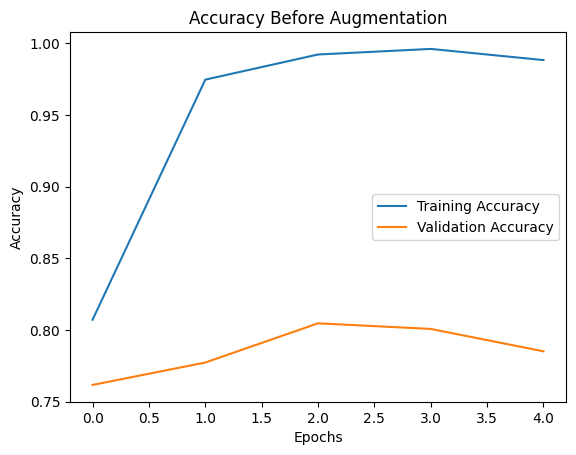

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7778 - loss: 1.5093
Test accuracy before augmentation: 0.78515625


In [5]:
# Build a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_no_aug = model.fit(train_ds, epochs=5, validation_data=test_ds)

# Plot accuracy
plt.plot(history_no_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_aug.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Before Augmentation')
plt.legend()
plt.show()

# Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy before augmentation: {test_acc}")


In [9]:
# Augment data with contrast, flipping, and rotation
def augment_data(dataset):
    def augment(image, label):
        image = tf.image.resize(image, (128, 128))
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
        return image, label

    return dataset.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

# Augment training data
augmented_train_ds = augment_data(ds_train)




Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.6371 - loss: 42.9097 - val_accuracy: 0.8516 - val_loss: 0.6706
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.9572 - loss: 0.1062 - val_accuracy: 0.8438 - val_loss: 0.6736
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step - accuracy: 0.9755 - loss: 0.0583 - val_accuracy: 0.8477 - val_loss: 0.6626
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9774 - loss: 0.0532 - val_accuracy: 0.8750 - val_loss: 0.6680
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.9897 - loss: 0.0375 - val_accuracy: 0.7891 - val_loss: 0.6568


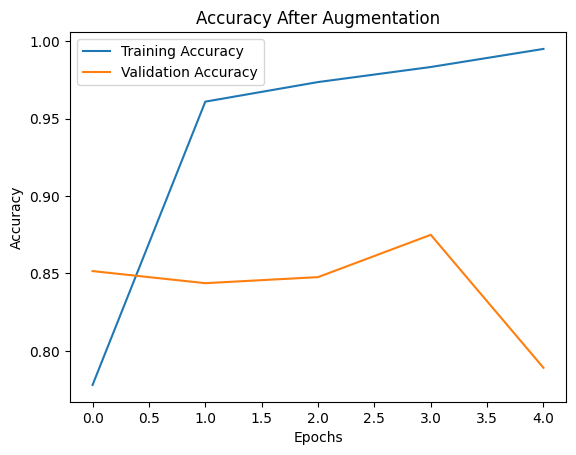

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7913 - loss: 0.6560
Test accuracy after augmentation: 0.7890625


In [7]:
# Reuse the same model architecture
model_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
history_aug = model_aug.fit(augmented_train_ds, epochs=5, validation_data=test_ds)

# Plot accuracy
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy After Augmentation')
plt.legend()
plt.show()

# Evaluate on test dataset
test_loss_aug, test_acc_aug = model_aug.evaluate(test_ds)
print(f"Test accuracy after augmentation: {test_acc_aug}")


Test accuracy before augmentation: 0.78515625
Test accuracy after augmentation: 0.7890625


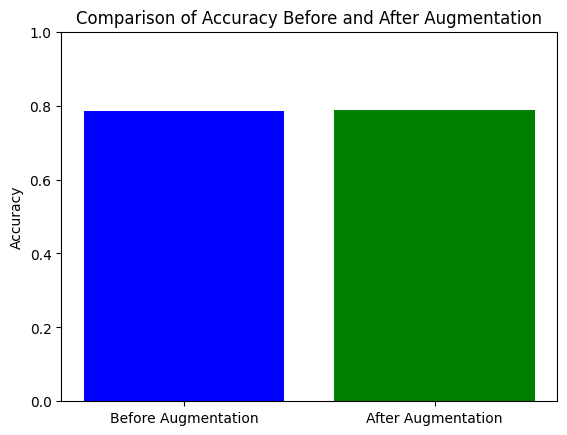

In [8]:
print(f"Test accuracy before augmentation: {test_acc}")
print(f"Test accuracy after augmentation: {test_acc_aug}")

# Plot comparison
labels = ['Before Augmentation', 'After Augmentation']
accuracy_values = [test_acc, test_acc_aug]

plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Before and After Augmentation')
plt.ylim([0, 1])
plt.show()
